In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np


Dataset

In [26]:
(X_train , Y_train) , (X_test , Y_test) =datasets.mnist.load_data()

In [27]:
len(X_train)

60000

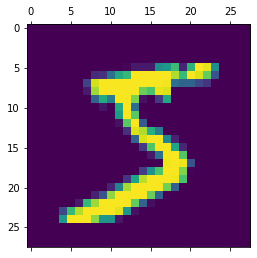

In [28]:
plt.matshow(X_train[0])

In [29]:
Y_train.shape

(60000,)

In [30]:
Y_train[0]

5

In [31]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [33]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
X_train = X_train/255
X_test = X_test/255

In [24]:
X_train[0].shape

(28, 28)

In [44]:
X_train = X_train.reshape(-1 , 28 , 28 , 1)
X_train.shape

(60000, 28, 28, 1)

In [45]:
X_test = X_test.reshape(-1 , 28 , 28 , 1)

In [47]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32 , kernel_size = (3 , 3) , activation = 'relu' , input_shape = (28 , 28 , 1)),
    layers.MaxPooling2D((2 , 2)),
    
    layers.Conv2D(filters = 20 , kernel_size = (3 , 3) , activation = 'relu'),
    layers.MaxPooling2D((2 , 2)),
    
    layers.Flatten(),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(20 , activation = 'softmax')
    
])

In [48]:
model.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy' ,
            metrics = ['accuracy']
           )

In [49]:
model.fit(X_train , Y_train , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4281 - accuracy: 0.9350
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0823 - accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0630 - accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0475 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0381 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0323 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0244 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0252 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0248 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 23s 12m

In [50]:
model.evaluate(X_test , Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1259 - accuracy: 0.9764


[0.12587128579616547, 0.9764000177383423]

In [53]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.05      0.16      0.08      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.07      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.05      0.01      0.02      1009
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0

    accuracy                           0.02     10000
 

F:\andrew_ng\New folder\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\andrew_ng\New folder\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
